In [5]:
### 분석 내용 
* 데이터 불러오기 
* 데이터 시각화
* 데이터 전처리 

SyntaxError: ignored

In [6]:
import pandas as pd 

In [7]:
# web 구글 데이터 셋에서 공개된 것들을 활용하여 데이터를 불러오기

train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [8]:
### 데이터 살펴보기

In [ ]:
### [].head()
###   .tail
## info(), describe

In [9]:
# 어떤 자료형을 갖고 있을까?
# 결측치를 확인할 수 있을까? 
print(train.columns)
print(test.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [ ]:
* 학습용 데이터와 테스트용 데이터가 특성의 차이가 없이 동일하다

In [10]:
# 직관적으로 결측치를 확인해보자 
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   

In [11]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [12]:
* 자료형은 실수형으로 보인다. 
* int64, float64, category, object, datetime자료형이 있다.

SyntaxError: ignored

In [ ]:
* 결측치가 학습용, 데스트용이 없다.

In [13]:
##데이터들의 요약값을 살펴보자. 
## decribe 안에 정보를 넣고 () 정보를 나타내서 함수로 나타내자 
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [15]:
시각화가 필요한 것 같다.

SyntaxError: ignored

In [16]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3e640910>,
      dtype=object)

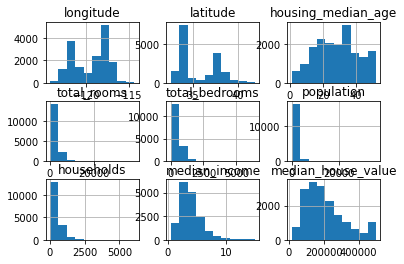

In [17]:
# 판다스는 시각화하는 기능도 가지고 있다. 
train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3e3e77d0>,
      dtype=object)

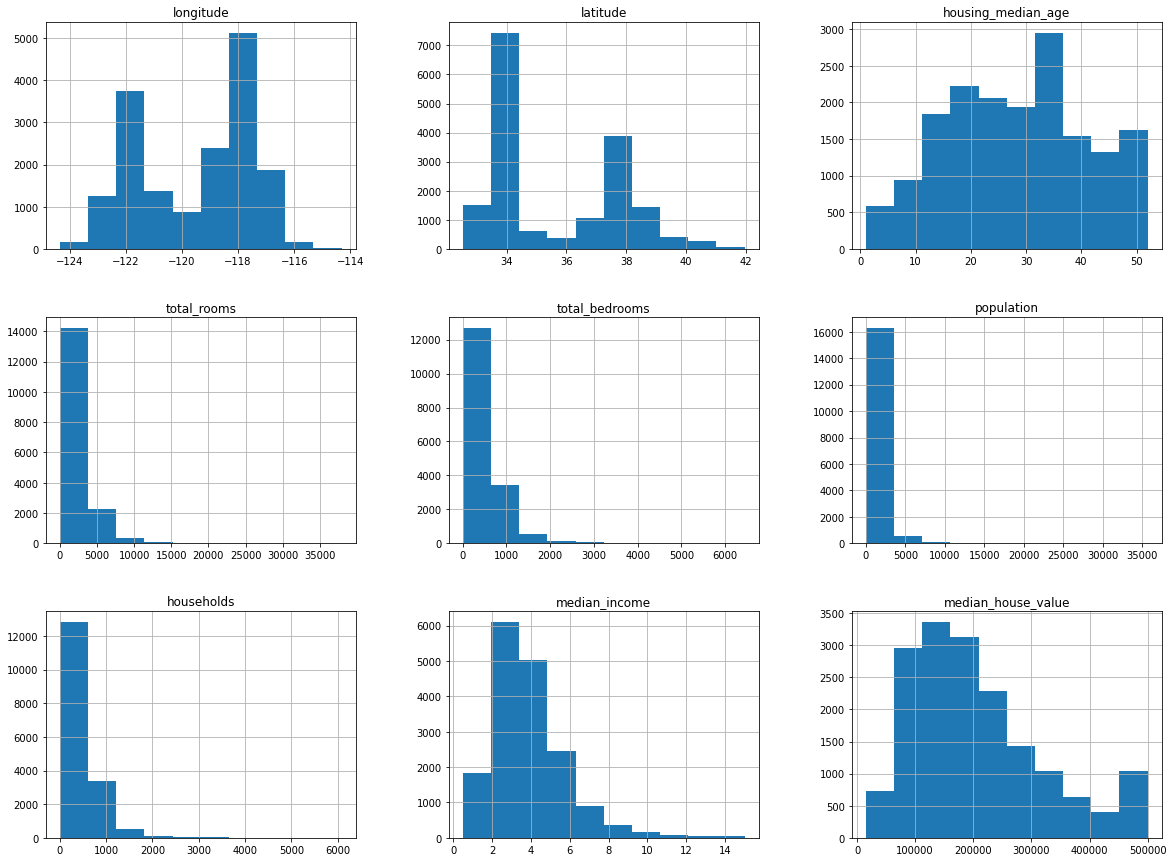

In [18]:
# 크기를 크게 해주기 
train.hist(figsize=(20,15))

In [19]:
## 범위 확인 
train['latitude'].describe()

count    17000.000000
mean        35.625225
std          2.137340
min         32.540000
25%         33.930000
50%         34.250000
75%         37.720000
max         41.950000
Name: latitude, dtype: float64

In [20]:
train['longitude'].describe()

count    17000.000000
mean      -119.562108
std          2.005166
min       -124.350000
25%       -121.790000
50%       -118.490000
75%       -118.000000
max       -114.310000
Name: longitude, dtype: float64

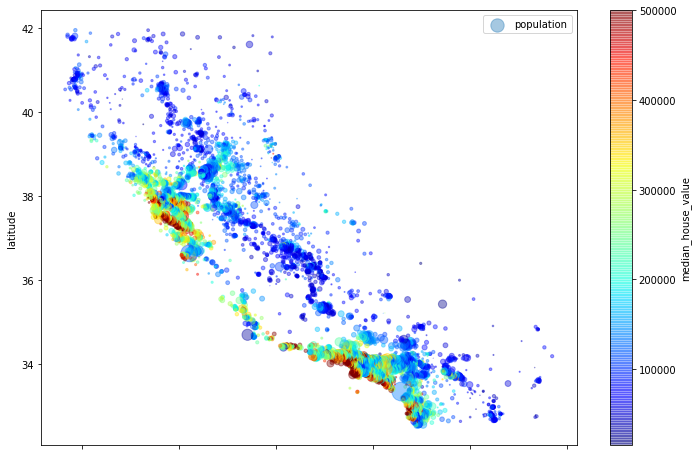

In [21]:
### 위도 경도에 따른 산점도 분포
train.plot(kind="scatter", x="longitude", y="latitude", 
           alpha=0.4, s=train["population"]/100, 
           label="population", c="median_house_value", figsize=(12,8),
           cmap=plt.get_cmap("jet"), colorbar=True)

In [22]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [23]:
sel = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
train_n = train[sel]
test_n = test[sel]

print("데이터 선택 확인", train_n.shape, test_n.shape)

데이터 선택 확인 (17000, 7) (3000, 7)
